In [1]:
import csv
import numpy as np
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1500)
pd.set_option('display.width', 1000)

Reading in the cleaned DataFrame with added features.

In [3]:
cancer = pd.read_csv('cancer_ml4.csv', index_col=['Geography'])

In [4]:
cancer.shape

(3047, 244)

In [5]:
cancer.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3047 entries, Abbeville County, South Carolina to Zavala County, Texas
Data columns (total 244 columns):
avgAnnCount                       float64
TARGET_deathRate                  float64
incidenceRate                     float64
medIncome                         int64
popEst2015                        int64
povertyPercent                    float64
studyPerCap                       float64
MedianAge                         float64
MedianAgeMale                     float64
MedianAgeFemale                   float64
AvgHouseholdSize                  float64
PercentMarried                    float64
PctNoHS18_24                      float64
PctHS18_24                        float64
PctSomeCol18_24                   float64
PctBachDeg18_24                   float64
PctHS25_Over                      float64
PctBachDeg25_Over                 float64
PctEmployed16_Over                float64
PctUnemployed16_Over              float64
PctPrivateCove

In [6]:
cancer.head()

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,PctSomeCol18_24_isnull,PctEmployed16_Over_isnull,PctPrivateCoverageAlone_isnull,age_gt_100,household_lt_1,"binnedInc_(34218.1, 37413.8]","binnedInc_(37413.8, 40362.7]","binnedInc_(40362.7, 42724.4]","binnedInc_(42724.4, 45201]","binnedInc_(45201, 48021.6]","binnedInc_(48021.6, 51046.4]","binnedInc_(51046.4, 54545.6]","binnedInc_(54545.6, 61494.5]","binnedInc_(61494.5, 125635]","binnedInc_[22640, 34218.1]",ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,utmda_l1,mskcc_l1,mayo_l1,hopkins_l1,dfb_l1,cleveland_l1,upmcps_l1,hlmcc_l1,mgs_l1,nw_mem_l1,chi_l1,nyc_l1,atlanta_l1,dallas_l1,denver_l1,los_ang_l1,seattle_l1,san_fran_l1,utmda_l2,mskcc_l2,mayo_l2,hopkins_l2,dfb_l2,cleveland_l2,upmcps_l2,hlmcc_l2,mgs_l2,nw_mem_l2,chi_l2,nyc_l2,atlanta_l2,dallas_l2,denver_l2,los_ang_l2,seattle_l2,san_fran_l2,onc_min_distsl1,onc_min_distsl2,city_min_distsl1,city_min_distsl2,sc_min_dists_l1,sc_min_dists_l2,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,PCT_LACCESS_POP10_isnull,PCT_LACCESS_LOWI10_isnull,PCT_LACCESS_CHILD10_isnull,PCT_LACCESS_SENIORS10_isnull,PCT_LACCESS_HHNV10_isnull,FOODINSEC_00_02,FOODINSEC_07_09,FOODINSEC_10_12,CH_FOODINSEC_02_12,CH_FOODINSEC_09_12,VLFOODSEC_00_02,VLFOODSEC_07_09,VLFOODSEC_10_12,CH_VLFOODSEC_02_12,CH_VLFOODSEC_09_12,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11,FOODINSEC_00_02_isnull,FOODINSEC_07_09_isnull,FOODINSEC_10_12_isnull,CH_FOODINSEC_02_12_isnull,CH_FOODINSEC_09_12_isnull,VLFOODSEC_00_02_isnull,VLFOODSEC_07_09_isnull,VLFOODSEC_10_12_isnull,CH_VLFOODSEC_02_12_isnull,CH_VLFOODSEC_09_12_isnull,FOODINSEC_CHILD_01_07_isnull,FOODINSEC_CHILD_03_11_isnull,PCT_LOCLFARM07,PCT_LOCLSALE07,PC_DIRSALES07,FMRKT09,FMRKT13,PCH_FMRKT_09_13,FMRKTPTH09,FMRKTPTH13,PCH_FMRKTPTH_09_13,PCT_FMRKT_SNAP13,PCT_FMRKT_WIC13,PCT_FMRKT_WICCASH13,PCT_FMRKT_SFMNP13,PCT_FRMKT_FRVEG13,PCT_FRMKT_ANMLPROD13,PCT_FMRKT_OTHER13,VEG_FARMS07,VEG_ACRES07,VEG_ACRESPTH07,FRESHVEG_FARMS07,FRESHVEG_ACRES07,FRESHVEG_ACRESPTH07,ORCHARD_FARMS07,ORCHARD_ACRES07,ORCHARD_ACRESPTH07,BERRY_FARMS07,BERRY_ACRES07,BERRY_ACRESPTH07,SLHOUSE07,GHVEG_FARMS07,GHVEG_SQFT07,GHVEG_SQFTPTH07,FOODHUB12,CSA07,AGRITRSM_OPS07,AGRITRSM_RCT07,FARM_TO_SCHOOL,PCT_LOCLFARM07_isnull,PCT_LOCLSALE07_isnull,PC_DIRSALES07_isnull,FMRKT09_isnull,FMRKT13_isnull,PCH_FMRKT_09_13_isnull,FMRKTPTH09_isnull,FMRKTPTH13_isnull,PCH_FMRKTPTH_09_13_isnull,PCT_FMRKT_SNAP13_isnull,PCT_FMRKT_WIC13_isnull,PCT_FMRKT_WICCASH13_isnull,PCT_FMRKT_SFMNP13_isnull,PCT_FRMKT_FRVEG13_isnull,PCT_FRMKT_ANMLPROD13_isnull,PCT_FMRKT_OTHER13_isnull,VEG_FARMS07_isnull,VEG_ACRES07_isnull,VEG_ACRESPTH07_isnull,FRESHVEG_FARMS07_isnull,FRESHVEG_ACRES07_isnull,FRESHVEG_ACRESPTH07_isnull,ORCHARD_FARMS07_isnull,ORCHARD_ACRES07_isnull,ORCHARD_ACRESPTH07_isnull,BERRY_FARMS07_isnull,BERRY_ACRES07_isnull,BERRY_ACRESPTH07_isnull,SLHOUSE07_isnull,GHVEG_FARMS07_isnull,GHVEG_SQFT07_isnull,GHVEG_SQFTPTH07_isnull,FOODHUB12_isnull,CSA07_isnull,AGRITRSM_OPS07_isnull,AGRITRSM_RCT07_isnull,FARM_TO_SCHOOL_isnull,PCT_DIABETES_ADULTS09,PCT_DIABETES_ADULTS10,PCT_OBESE_ADULTS09,PCT_OBESE_ADULTS10,PCT_OBESE_ADULTS13,PCT_OBESE_CHILD08,PCT_OBESE_CHILD11,PCH_OBESE_CHILD_08_11,PCT_HSPA09,RECFAC07,RECFAC12,PCH_RECFAC_07_12,RECFACPTH07,RECFACPTH12,PCH_RECFACPTH_07_12,NATAMEN,PCT_OBESE_CHILD08_isnull,PCT_OBESE_CHILD11_isnull,PCH_OBESE_CHILD_08_11_isnull,PCT_HSPA09_isnull,PCH_RECFAC_07_12_isnull,PCH_RECFACPTH_07_12_isnull,NATAMEN_isnull,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00,avgAnnCount_sqrd,medIncome_sqrd,popEst2015_sqrd,povertyPercent_lo

In [7]:
cancer.describe()

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,"binnedInc_(34218.1, 37413.8]","binnedInc_(37413.8, 40362.7]","binnedInc_(40362.7, 42724.4]","binnedInc_(42724.4, 45201]","binnedInc_(45201, 48021.6]","binnedInc_(48021.6, 51046.4]","binnedInc_(51046.4, 54545.6]","binnedInc_(54545.6, 61494.5]","binnedInc_(61494.5, 125635]","binnedInc_[22640, 34218.1]",ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG,utmda_l1,mskcc_l1,mayo_l1,hopkins_l1,dfb_l1,cleveland_l1,upmcps_l1,hlmcc_l1,mgs_l1,nw_mem_l1,chi_l1,nyc_l1,atlanta_l1,dallas_l1,denver_l1,los_ang_l1,seattle_l1,san_fran_l1,utmda_l2,mskcc_l2,mayo_l2,hopkins_l2,dfb_l2,cleveland_l2,upmcps_l2,hlmcc_l2,mgs_l2,nw_mem_l2,chi_l2,nyc_l2,atlanta_l2,dallas_l2,denver_l2,los_ang_l2,seattle_l2,san_fran_l2,onc_min_distsl1,onc_min_distsl2,city_min_distsl1,city_min_distsl2,sc_min_dists_l1,sc_min_dists_l2,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10,PCT_LACCESS_HHNV10,FOODINSEC_00_02,FOODINSEC_07_09,FOODINSEC_10_12,CH_FOODINSEC_02_12,CH_FOODINSEC_09_12,VLFOODSEC_00_02,VLFOODSEC_07_09,VLFOODSEC_10_12,CH_VLFOODSEC_02_12,CH_VLFOODSEC_09_12,FOODINSEC_CHILD_01_07,FOODINSEC_CHILD_03_11,PCT_LOCLFARM07,PCT_LOCLSALE07,PC_DIRSALES07,FMRKT09,FMRKT13,PCH_FMRKT_09_13,FMRKTPTH09,FMRKTPTH13,PCH_FMRKTPTH_09_13,PCT_FMRKT_SNAP13,PCT_FMRKT_WIC13,PCT_FMRKT_WICCASH13,PCT_FMRKT_SFMNP13,PCT_FRMKT_FRVEG13,PCT_FRMKT_ANMLPROD13,PCT_FMRKT_OTHER13,VEG_FARMS07,VEG_ACRES07,VEG_ACRESPTH07,FRESHVEG_FARMS07,FRESHVEG_ACRES07,FRESHVEG_ACRESPTH07,ORCHARD_FARMS07,ORCHARD_ACRES07,ORCHARD_ACRESPTH07,BERRY_FARMS07,BERRY_ACRES07,BERRY_ACRESPTH07,SLHOUSE07,GHVEG_FARMS07,GHVEG_SQFT07,GHVEG_SQFTPTH07,FOODHUB12,CSA07,AGRITRSM_OPS07,AGRITRSM_RCT07,FARM_TO_SCHOOL,PCT_DIABETES_ADULTS09,PCT_DIABETES_ADULTS10,PCT_OBESE_ADULTS09,PCT_OBESE_ADULTS10,PCT_OBESE_ADULTS13,PCT_OBESE_CHILD08,PCT_OBESE_CHILD11,PCH_OBESE_CHILD_08_11,PCT_HSPA09,RECFAC07,RECFAC12,PCH_RECFAC_07_12,RECFACPTH07,RECFACPTH12,PCH_RECFACPTH_07_12,NATAMEN,PERPOV10,CHILDPOVRATE10,PERCHLDPOV10,METRO13,POPLOSS00,avgAnnCount_sqrd,medIncome_sqrd,popEst2015_sqrd,povertyPercent_log,studyPerCap_sqrd,MedianAge_log,MedianAgeFemale_sqrd,PercentMarried_log,PctEmployed16_Over_log,PctUnemployed16_Over_sqrd,PctPrivateCoverage_log,PctPrivateCoverage_sqrd,PctEmpPrivCoverage_log,PctPublicCoverageAlone_log,BirthRate_sqrd,INTPTLONG_sqrd
count,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.

In [8]:
cancer.columns

Index(['avgAnnCount', 'TARGET_deathRate', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale',
       ...
       'MedianAgeFemale_sqrd', 'PercentMarried_log', 'PctEmployed16_Over_log', 'PctUnemployed16_Over_sqrd', 'PctPrivateCoverage_log', 'PctPrivateCoverage_sqrd', 'PctEmpPrivCoverage_log', 'PctPublicCoverageAlone_log', 'BirthRate_sqrd', 'INTPTLONG_sqrd'], dtype='object', length=244)

Checking for duplicate rows in the DataFrame

In [9]:
cancer = cancer.drop_duplicates()
cancer.shape

(3047, 244)

Checking for variables with missing values, using both the .isnull().sum() and .isna().sum() chained methods.

A list of all the columns with missing values is called.

In [10]:
null_value_columns = list(cancer.columns[(cancer.isnull().sum()>0) | (cancer.isna().sum()>0)])
null_value_columns

[]

## Mining Logarithmic and Exponential Transformations of the Feature Set for Increased Accuracy

The next series of cells looks for extra information left in the feature set that the model won't be able utilize in a linear fashion to make a good fit. This can be done by looking for non-linear patterns in plots of the actual values of each individual feature and the actual target variable values, overlaid with plots of the actual values of each individual feature against the predicted target variable values. Additionally, a plot of the actual values of each individual feature and the residuals will be executed. Logarithmic and exponential versions of each feature will be investigated for their contribution to the predictive power of the model. 

In [11]:
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [12]:
lr = linear_model.LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
y = cancer['TARGET_deathRate']

In [14]:
target_name = ['TARGET_deathRate']
X = cancer[[cn for cn in cancer.columns if cn not in target_name]]

In [15]:
X.columns

Index(['avgAnnCount', 'incidenceRate', 'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       ...
       'MedianAgeFemale_sqrd', 'PercentMarried_log', 'PctEmployed16_Over_log', 'PctUnemployed16_Over_sqrd', 'PctPrivateCoverage_log', 'PctPrivateCoverage_sqrd', 'PctEmpPrivCoverage_log', 'PctPublicCoverageAlone_log', 'BirthRate_sqrd', 'INTPTLONG_sqrd'], dtype='object', length=243)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
lr.score(X_test, y_test)

0.5976562927604565

## 'mskcc_l1': L1 distance of county centroids from Memorial Sloan Kettering Cancer Center

In [19]:
X36 = np.array(cancer['mskcc_l1'])
X36 = X36.reshape(-1, 1)

In [20]:
lr.fit(X36, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
lr.score(X36, y)

0.05102892573001139

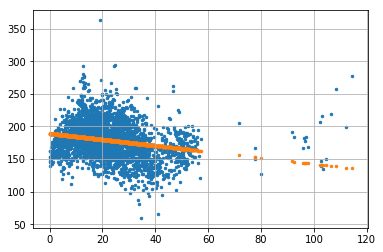

In [22]:
plt.scatter(X36, y, s=6)
plt.scatter(X36, lr.predict(X36), s=6)
plt.grid()

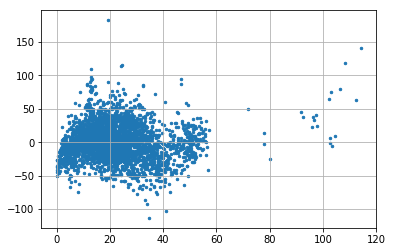

In [23]:
plt.scatter(X36, y - lr.predict(X36), s=6)
plt.grid()

In [24]:
X36.shape

(3047, 1)

In [25]:
dfx36 = pd.DataFrame(X36)
dfx36.head()

,0
0,15.026117
1,28.920640
2,4.792963
3,44.967753
4,21.078592


In [26]:
dfx36['mskcc_l1_log'] = np.log(X36)

In [27]:
dfx36.head()

,0,mskcc_l1_log
0,15.026117,2.709790
1,28.920640,3.364556
2,4.792963,1.567149
3,44.967753,3.805946
4,21.078592,3.048258


In [28]:
lr.fit(dfx36, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
lr.score(dfx36, y)

0.06556802091158587

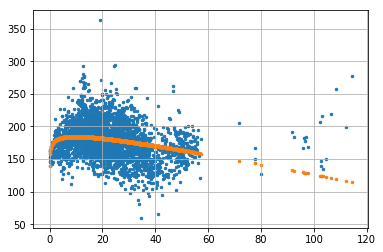

In [30]:
plt.scatter(X36, y, s=6) 
plt.scatter(X36, lr.predict(dfx36), s=6)
plt.grid()

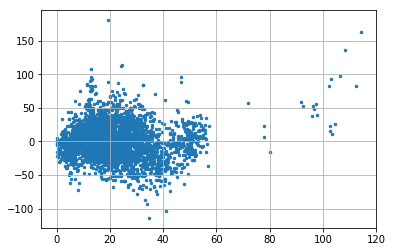

In [31]:
plt.scatter(X36, y - lr.predict(dfx36), s=6)
plt.grid()

In [32]:
dfx36['mskcc_l1_sqrd'] = X36**2

In [33]:
dfx36.head()

,0,mskcc_l1_log,mskcc_l1_sqrd
0,15.026117,2.709790,225.784192
1,28.920640,3.364556,836.403418
2,4.792963,1.567149,22.972494
3,44.967753,3.805946,2022.098810
4,21.078592,3.048258,444.307041


In [34]:
lr.fit(dfx36, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
lr.score(dfx36, y)

0.12018277657580612

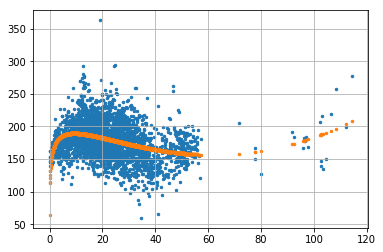

In [36]:
plt.scatter(X36, y, s=6) 
plt.scatter(X36, lr.predict(dfx36), s=6)
plt.grid()

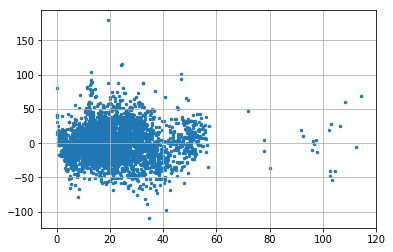

In [37]:
plt.scatter(X36, y - lr.predict(dfx36), s=6)
plt.grid()

In [38]:
X['mskcc_l1_log'] = np.log(X['mskcc_l1'])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
lr.score(X_test, y_test)

0.5950337147585998

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [42]:
X = X.drop(columns = 'mskcc_l1_log')

In [43]:
X['mskcc_l1_sqrd'] = X['mskcc_l1']**2

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
lr.score(X_test, y_test)

0.5925986472382407

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [47]:
X = X.drop(columns = 'mskcc_l1_sqrd')

## 'mayo_l1': L1 distance of county centroids from Mayo Clinic

In [48]:
X37 = np.array(cancer['mayo_l1'])
X37 = X37.reshape(-1, 1)

In [49]:
lr.fit(X37, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
lr.score(X37, y)

0.004989060890986274

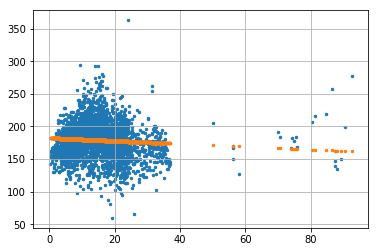

In [51]:
plt.scatter(X37, y, s=6)
plt.scatter(X37, lr.predict(X37), s=6)
plt.grid()

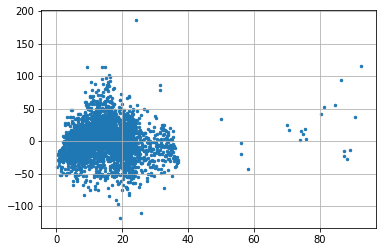

In [52]:
plt.scatter(X37, y - lr.predict(X37), s=6)
plt.grid()

In [53]:
X37.shape

(3047, 1)

In [54]:
dfx37 = pd.DataFrame(X37)
dfx37.head()

,0
0,19.806901
1,13.787466
2,22.966249
3,24.348299
4,4.705036


In [55]:
dfx37['mayo_l1_log'] = np.log(X37)

In [56]:
dfx37.head()

,0,mayo_l1_log
0,19.806901,2.986030
1,13.787466,2.623760
2,22.966249,3.134026
3,24.348299,3.192462
4,4.705036,1.548633


In [57]:
lr.fit(dfx37, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
lr.score(dfx37, y)

0.024196084249075933

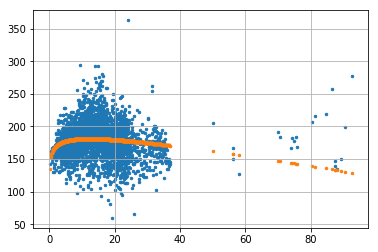

In [59]:
plt.scatter(X37, y, s=6) 
plt.scatter(X37, lr.predict(dfx37), s=6)
plt.grid()

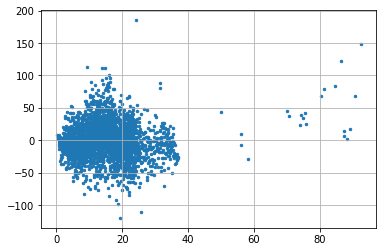

In [60]:
plt.scatter(X37, y - lr.predict(dfx37), s=6)
plt.grid()

In [61]:
dfx37['mayo_l1_sqrd'] = X37**2

In [62]:
dfx37.head()

,0,mayo_l1_log,mayo_l1_sqrd
0,19.806901,2.986030,392.313327
1,13.787466,2.623760,190.094219
2,22.966249,3.134026,527.448593
3,24.348299,3.192462,592.839664
4,4.705036,1.548633,22.137364


In [63]:
lr.fit(dfx37, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
lr.score(dfx37, y)

0.06535728806914631

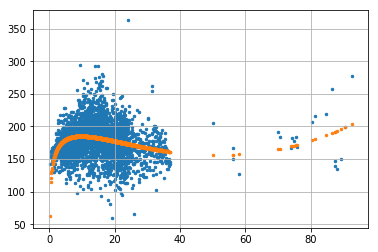

In [65]:
plt.scatter(X37, y, s=6) 
plt.scatter(X37, lr.predict(dfx37), s=6)
plt.grid()

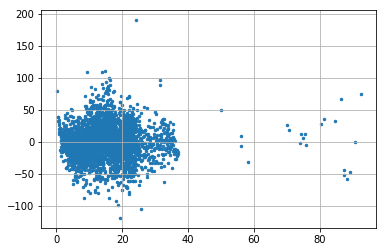

In [66]:
plt.scatter(X37, y - lr.predict(dfx37), s=6)
plt.grid()

In [67]:
X['mayo_l1_log'] = np.log(X['mayo_l1'])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
lr.score(X_test, y_test)

0.5966492749550778

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [71]:
X = X.drop(columns = 'mayo_l1_log')

In [72]:
X['mayo_l1_sqrd'] = X['mayo_l1']**2

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
lr.score(X_test, y_test)

0.5948511737289475

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [76]:
X = X.drop(columns = 'mayo_l1_sqrd')

The L1 distances to individual top 10 oncology hospitals seem to be following a pattern of resulting in slight drops in overall model accuracy, so in interest of time, the rest of this series of features will not be tried for logarithmic and exponential increase in model accuracy.

## 'chi_l1': L1 distance of county centroids from Chicago

In [77]:
X38 = np.array(cancer['chi_l1'])
X38 = X38.reshape(-1, 1)

In [78]:
lr.fit(X38, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
lr.score(X38, y)

0.052694496196274865

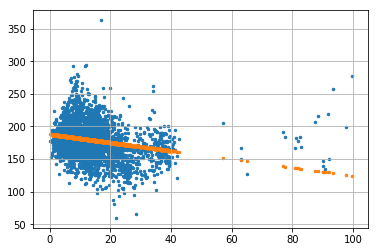

In [80]:
plt.scatter(X38, y, s=6)
plt.scatter(X38, lr.predict(X38), s=6)
plt.grid()

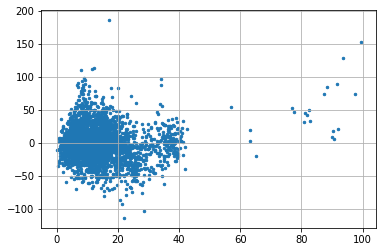

In [81]:
plt.scatter(X38, y - lr.predict(X38), s=6)
plt.grid()

In [82]:
X38.shape

(3047, 1)

In [83]:
dfx38 = pd.DataFrame(X38)
dfx38.head()

,0
0,12.824801
1,16.367840
2,15.984149
3,30.187953
4,7.397936


In [84]:
dfx38['chi_l1_log'] = np.log(X38)

In [85]:
dfx38.head()

,0,chi_l1_log
0,12.824801,2.551381
1,16.367840,2.795318
2,15.984149,2.771598
3,30.187953,3.407443
4,7.397936,2.001201


In [86]:
lr.fit(dfx38, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [87]:
lr.score(dfx38, y)

0.05628840084591391

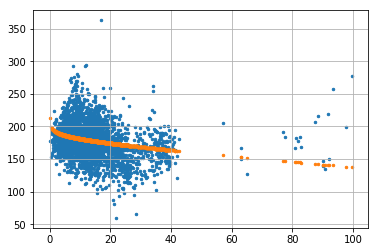

In [88]:
plt.scatter(X38, y, s=6) 
plt.scatter(X38, lr.predict(dfx38), s=6)
plt.grid()

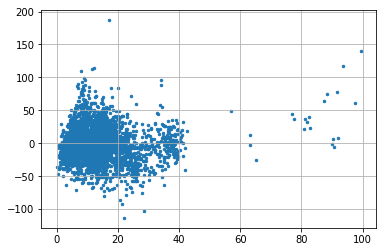

In [89]:
plt.scatter(X38, y - lr.predict(dfx38), s=6)
plt.grid()

In [90]:
dfx38['chi_l1_sqrd'] = X38**2

In [91]:
dfx38.head()

,0,chi_l1_log,chi_l1_sqrd
0,12.824801,2.551381,164.475521
1,16.367840,2.795318,267.906186
2,15.984149,2.771598,255.493019
3,30.187953,3.407443,911.312506
4,7.397936,2.001201,54.729457


In [92]:
lr.fit(dfx38, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [93]:
lr.score(dfx38, y)

0.10431523634359563

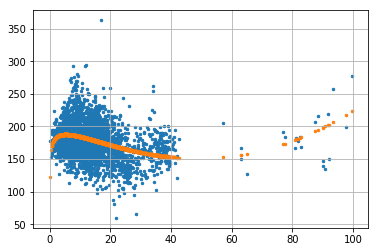

In [94]:
plt.scatter(X38, y, s=6) 
plt.scatter(X38, lr.predict(dfx38), s=6)
plt.grid()

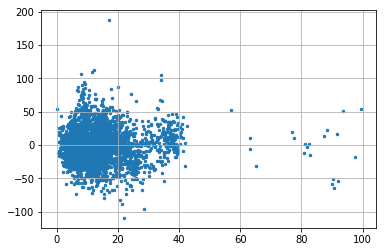

In [95]:
plt.scatter(X38, y - lr.predict(dfx38), s=6)
plt.grid()

In [96]:
X['chi_l1_log'] = np.log(X['chi_l1'])

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [99]:
lr.score(X_test, y_test)

0.5917682663428434

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [100]:
X = X.drop(columns = 'chi_l1_log')

In [101]:
X['chi_l1_sqrd'] = X['chi_l1']**2

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
lr.score(X_test, y_test)

0.5911644137097097

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [105]:
X = X.drop(columns = 'chi_l1_sqrd')

The individual city L1 and L2 distance variables don't seem to be increasing the overall accuracy, so the features storing the distance to the closest oncology hospital and urban center are looked at next.

## 'onc_min_distsl1': L1 distance to the closest oncology hospital

In [106]:
X39 = np.array(cancer['onc_min_distsl1'])
X39 = X39.reshape(-1, 1)

In [107]:
lr.fit(X39, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [108]:
lr.score(X39, y)

0.028025498321338382

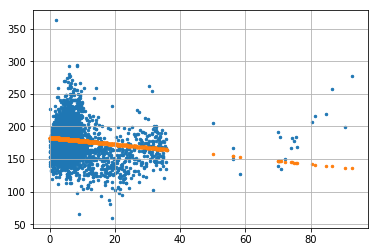

In [109]:
plt.scatter(X39, y, s=6)
plt.scatter(X39, lr.predict(X39), s=6)
plt.grid()

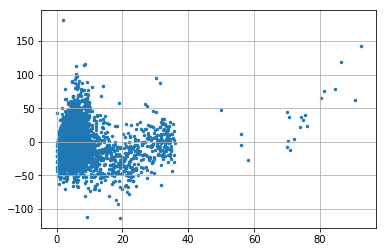

In [110]:
plt.scatter(X39, y - lr.predict(X39), s=6)
plt.grid()

In [111]:
X39.shape

(3047, 1)

In [112]:
dfx39 = pd.DataFrame(X39)
dfx39.head()

,0
0,6.196399
1,3.570060
2,2.365649
3,24.348299
4,4.705036


In [113]:
dfx39['onc_min_distsl1_log'] = np.log(X39)

In [114]:
dfx39.head()

,0,onc_min_distsl1_log
0,6.196399,1.823968
1,3.570060,1.272582
2,2.365649,0.861052
3,24.348299,3.192462
4,4.705036,1.548633


In [115]:
lr.fit(dfx39, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [116]:
lr.score(dfx39, y)

0.03128765909741549

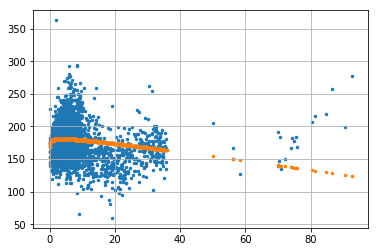

In [117]:
plt.scatter(X39, y, s=6) 
plt.scatter(X39, lr.predict(dfx39), s=6)
plt.grid()

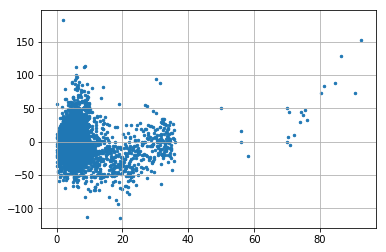

In [118]:
plt.scatter(X39, y - lr.predict(dfx39), s=6)
plt.grid()

In [119]:
dfx39['onc_min_distsl1_sqrd'] = X39**2

In [120]:
dfx39.head()

,0,onc_min_distsl1_log,onc_min_distsl1_sqrd
0,6.196399,1.823968,38.395361
1,3.570060,1.272582,12.745328
2,2.365649,0.861052,5.596295
3,24.348299,3.192462,592.839664
4,4.705036,1.548633,22.137364


In [121]:
lr.fit(dfx39, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [122]:
lr.score(dfx39, y)

0.10239096052669483

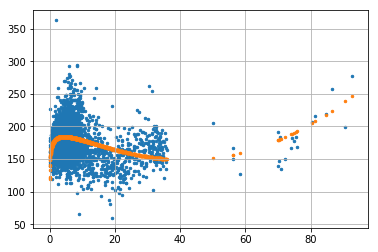

In [123]:
plt.scatter(X39, y, s=6) 
plt.scatter(X39, lr.predict(dfx39), s=6)
plt.grid()

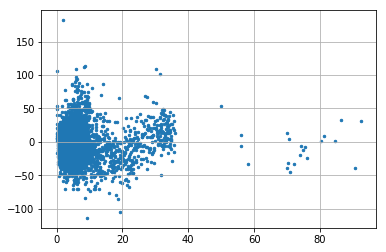

In [124]:
plt.scatter(X39, y - lr.predict(dfx39), s=6)
plt.grid()

In [125]:
X['onc_min_distsl1_log'] = np.log(X['onc_min_distsl1'])

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [128]:
lr.score(X_test, y_test)

0.5917563729425864

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [129]:
X = X.drop(columns = 'onc_min_distsl1_log')

In [130]:
X['onc_min_distsl1_sqrd'] = X['onc_min_distsl1']**2

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [133]:
lr.score(X_test, y_test)

0.5972455343778891

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [134]:
X = X.drop(columns = 'onc_min_distsl1_sqrd')

## 'onc_min_distsl2': L2 distance to the closest oncology hospital

In [135]:
X40 = np.array(cancer['onc_min_distsl2'])
X40 = X40.reshape(-1, 1)

In [136]:
lr.fit(X40, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [137]:
lr.score(X40, y)

0.029328351278064213

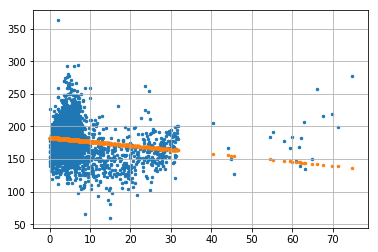

In [138]:
plt.scatter(X40, y, s=6)
plt.scatter(X40, lr.predict(X40), s=6)
plt.grid()

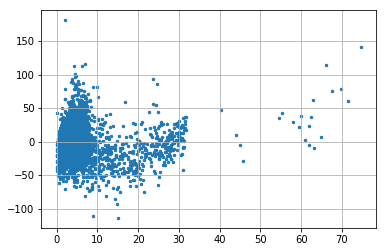

In [139]:
plt.scatter(X40, y - lr.predict(X40), s=6)
plt.grid()

In [140]:
X40.shape

(3047, 1)

In [141]:
dfx40 = pd.DataFrame(X40)
dfx40.head()

,0
0,6.163629
1,3.042871
2,1.743634
3,23.783937
4,3.361865


In [142]:
dfx40['onc_min_distsl2_log'] = np.log(X40)

In [143]:
dfx40.head()

,0,onc_min_distsl2_log
0,6.163629,1.818666
1,3.042871,1.112802
2,1.743634,0.555972
3,23.783937,3.169010
4,3.361865,1.212496


In [144]:
lr.fit(dfx40, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [145]:
lr.score(dfx40, y)

0.032413272332168064

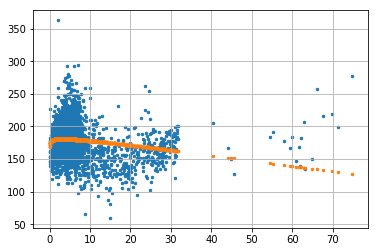

In [146]:
plt.scatter(X40, y, s=6) 
plt.scatter(X40, lr.predict(dfx40), s=6)
plt.grid()

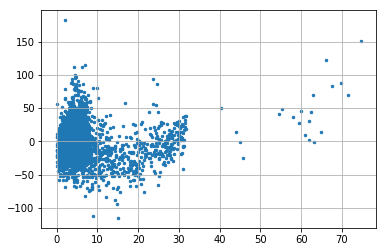

In [147]:
plt.scatter(X40, y - lr.predict(dfx40), s=6)
plt.grid()

In [148]:
dfx40['onc_min_distsl2_sqrd'] = X40**2

In [149]:
dfx40.head()

,0,onc_min_distsl2_log,onc_min_distsl2_sqrd
0,6.163629,1.818666,37.990317
1,3.042871,1.112802,9.259066
2,1.743634,0.555972,3.040260
3,23.783937,3.169010,565.675639
4,3.361865,1.212496,11.302137


In [150]:
lr.fit(dfx40, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [151]:
lr.score(dfx40, y)

0.09718123743005358

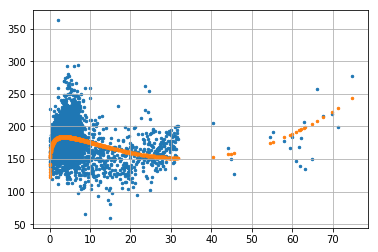

In [152]:
plt.scatter(X40, y, s=6) 
plt.scatter(X40, lr.predict(dfx40), s=6)
plt.grid()

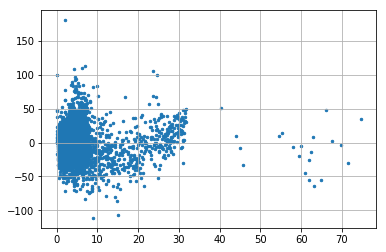

In [153]:
plt.scatter(X40, y - lr.predict(dfx40), s=6)
plt.grid()

In [154]:
X['onc_min_distsl2_log'] = np.log(X['onc_min_distsl2'])

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [157]:
lr.score(X_test, y_test)

0.5928812579364245

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [158]:
X = X.drop(columns = 'onc_min_distsl2_log')

In [159]:
X['onc_min_distsl2_sqrd'] = X['onc_min_distsl2']**2

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [162]:
lr.score(X_test, y_test)

0.5987044449169547

The squared version increased the accuracy, so it is added to the core feature set.

In [163]:
cancer['onc_min_distsl2_sqrd'] = cancer['onc_min_distsl2']**2

## 'city_min_distsl1': L1 distance to the closest major city

In [164]:
X41 = np.array(cancer['city_min_distsl1'])
X41 = X41.reshape(-1, 1)

In [165]:
lr.fit(X41, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [166]:
lr.score(X41, y)

0.0031219786029590413

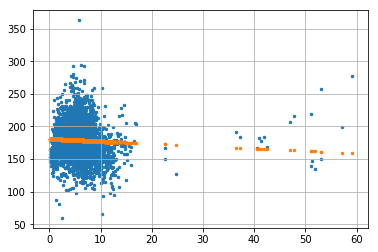

In [167]:
plt.scatter(X41, y, s=6)
plt.scatter(X41, lr.predict(X41), s=6)
plt.grid()

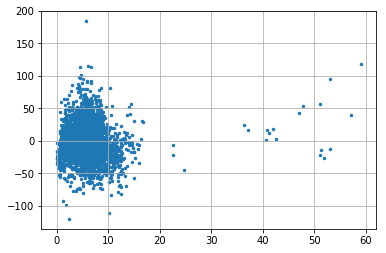

In [168]:
plt.scatter(X41, y - lr.predict(X41), s=6)
plt.grid()

In [169]:
X41.shape

(3047, 1)

In [170]:
dfx41 = pd.DataFrame(X41)
dfx41.head()

,0
0,2.413983
1,6.871166
2,4.698663
3,10.242447
4,7.397936


In [171]:
dfx41['city_min_distsl1_log'] = np.log(X41)

In [172]:
dfx41.head()

,0,city_min_distsl1_log
0,2.413983,0.881278
1,6.871166,1.927334
2,4.698663,1.547278
3,10.242447,2.326541
4,7.397936,2.001201


In [173]:
lr.fit(dfx41, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [174]:
lr.score(dfx41, y)

0.005810754842397681

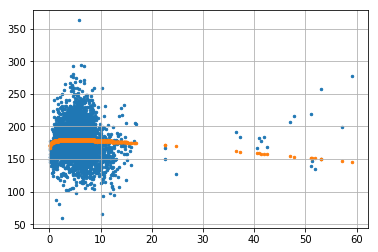

In [175]:
plt.scatter(X41, y, s=6) 
plt.scatter(X41, lr.predict(dfx41), s=6)
plt.grid()

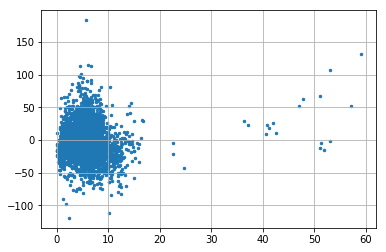

In [176]:
plt.scatter(X41, y - lr.predict(dfx41), s=6)
plt.grid()

In [177]:
dfx41['city_min_distsl1_sqrd'] = X41**2

In [178]:
dfx41.head()

,0,city_min_distsl1_log,city_min_distsl1_sqrd
0,2.413983,0.881278,5.827314
1,6.871166,1.927334,47.212922
2,4.698663,1.547278,22.077434
3,10.242447,2.326541,104.907721
4,7.397936,2.001201,54.729457


In [179]:
lr.fit(dfx41, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [180]:
lr.score(dfx41, y)

0.05116548935820442

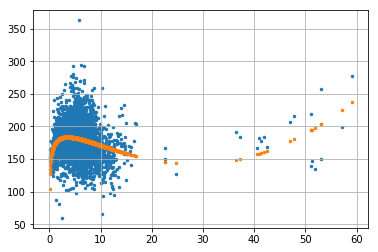

In [181]:
plt.scatter(X41, y, s=6) 
plt.scatter(X41, lr.predict(dfx41), s=6)
plt.grid()

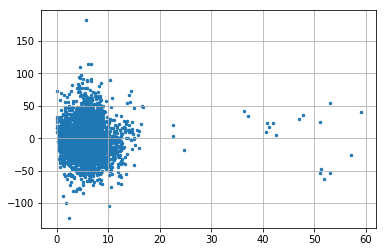

In [182]:
plt.scatter(X41, y - lr.predict(dfx41), s=6)
plt.grid()

In [183]:
X['city_min_distsl1_log'] = np.log(X['city_min_distsl1'])

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [186]:
lr.score(X_test, y_test)

0.6012327903620298

The logarithmic version resulted in an increase in accuracy, so it is added to the core feature set.

In [187]:
cancer['city_min_distsl1_log'] = np.log(cancer['city_min_distsl1'])

In [188]:
X['city_min_distsl1_sqrd'] = X['city_min_distsl1']**2

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [191]:
lr.score(X_test, y_test)

0.5977881549584005

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [192]:
X = X.drop(columns = 'city_min_distsl1_sqrd')

## 'city_min_distsl2': L2 distance to the closest major city

In [193]:
X42 = np.array(cancer['city_min_distsl2'])
X42 = X42.reshape(-1, 1)

In [194]:
lr.fit(X42, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [195]:
lr.score(X42, y)

0.0033802414431115535

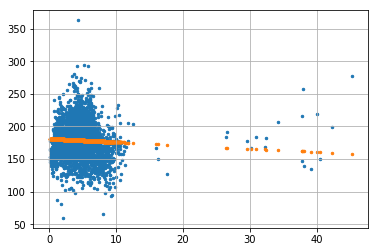

In [196]:
plt.scatter(X42, y, s=6)
plt.scatter(X42, lr.predict(X42), s=6)
plt.grid()

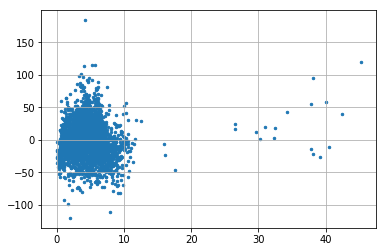

In [197]:
plt.scatter(X42, y - lr.predict(X42), s=6)
plt.grid()

In [198]:
X42.shape

(3047, 1)

In [199]:
dfx42 = pd.DataFrame(X42)
dfx42.head()

,0
0,1.992629
1,5.041121
2,3.428234
3,7.370353
4,6.870380


In [200]:
dfx42['city_min_distsl2_log'] = np.log(X42)

In [201]:
dfx42.head()

,0,city_min_distsl2_log
0,1.992629,0.689455
1,5.041121,1.617629
2,3.428234,1.232045
3,7.370353,1.997466
4,6.870380,1.927219


In [202]:
lr.fit(dfx42, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [203]:
lr.score(dfx42, y)

0.006752816208485113

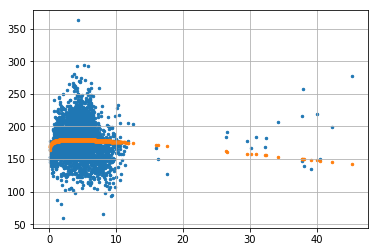

In [204]:
plt.scatter(X42, y, s=6) 
plt.scatter(X42, lr.predict(dfx42), s=6)
plt.grid()

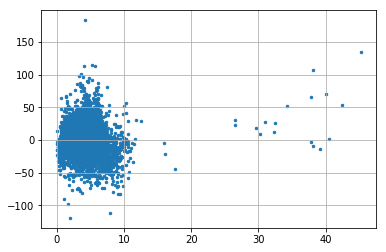

In [205]:
plt.scatter(X42, y - lr.predict(dfx42), s=6)
plt.grid()

In [206]:
dfx42['city_min_distsl2_sqrd'] = X42**2

In [207]:
dfx42.head()

,0,city_min_distsl2_log,city_min_distsl2_sqrd
0,1.992629,0.689455,3.970571
1,5.041121,1.617629,25.412905
2,3.428234,1.232045,11.752788
3,7.370353,1.997466,54.322107
4,6.870380,1.927219,47.202119


In [208]:
lr.fit(dfx42, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [209]:
lr.score(dfx42, y)

0.053875250540314945

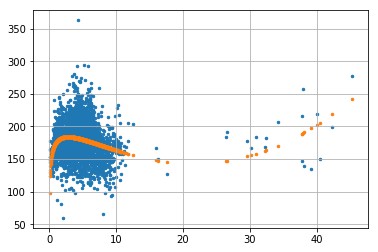

In [210]:
plt.scatter(X42, y, s=6) 
plt.scatter(X42, lr.predict(dfx42), s=6)
plt.grid()

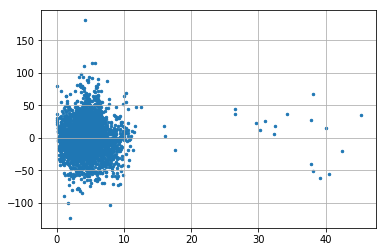

In [211]:
plt.scatter(X42, y - lr.predict(dfx42), s=6)
plt.grid()

In [212]:
X['city_min_distsl2_log'] = np.log(X['city_min_distsl2'])

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [214]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [215]:
lr.score(X_test, y_test)

0.5934347030360057

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [216]:
X = X.drop(columns = 'city_min_distsl2_log')

In [217]:
X['city_min_distsl2_sqrd'] = X['city_min_distsl2']**2

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [219]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [220]:
lr.score(X_test, y_test)

0.597203425207262

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [221]:
X = X.drop(columns = 'city_min_distsl2_sqrd')

## 'sc_min_dists_l1': L1 distance to the closest EPA Superfund Cleanup Site

In [222]:
X43 = np.array(cancer['sc_min_dists_l1'])
X43 = X43.reshape(-1, 1)

In [223]:
lr.fit(X43, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [224]:
lr.score(X43, y)

0.006985514245002045

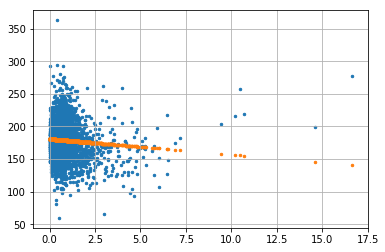

In [225]:
plt.scatter(X43, y, s=6)
plt.scatter(X43, lr.predict(X43), s=6)
plt.grid()

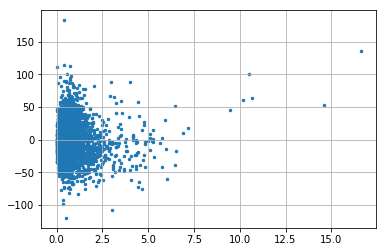

In [226]:
plt.scatter(X43, y - lr.predict(X43), s=6)
plt.grid()

In [227]:
X43.shape

(3047, 1)

In [228]:
dfx43 = pd.DataFrame(X43)
dfx43.head()

,0
0,0.509339
1,0.249904
2,1.166387
3,0.783103
4,0.592789


In [229]:
dfx43['sc_min_dists_l1_log'] = np.log(X43)

In [230]:
dfx43.head()

,0,sc_min_dists_l1_log
0,0.509339,-0.674641
1,0.249904,-1.386678
2,1.166387,0.153911
3,0.783103,-0.244491
4,0.592789,-0.522917


In [231]:
lr.fit(dfx43, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [232]:
lr.score(dfx43, y)

0.006996959483670628

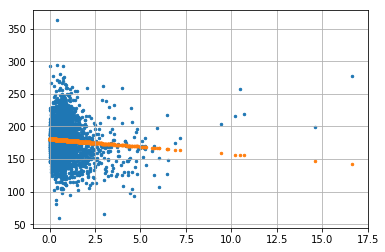

In [233]:
plt.scatter(X43, y, s=6) 
plt.scatter(X43, lr.predict(dfx43), s=6)
plt.grid()

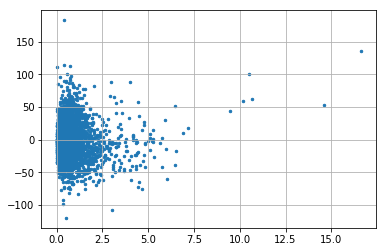

In [234]:
plt.scatter(X43, y - lr.predict(dfx43), s=6)
plt.grid()

In [235]:
dfx43['sc_min_dists_l1_sqrd'] = X43**2

In [236]:
dfx43.head()

,0,sc_min_dists_l1_log,sc_min_dists_l1_sqrd
0,0.509339,-0.674641,0.259426
1,0.249904,-1.386678,0.062452
2,1.166387,0.153911,1.360459
3,0.783103,-0.244491,0.613250
4,0.592789,-0.522917,0.351399


In [237]:
lr.fit(dfx43, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [238]:
lr.score(dfx43, y)

0.034102866966984946

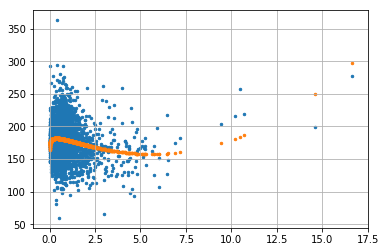

In [239]:
plt.scatter(X43, y, s=6) 
plt.scatter(X43, lr.predict(dfx43), s=6)
plt.grid()

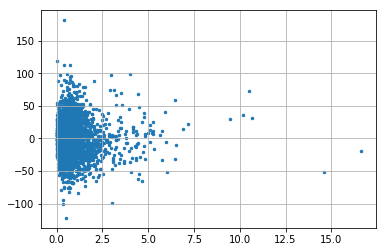

In [240]:
plt.scatter(X43, y - lr.predict(dfx43), s=6)
plt.grid()

In [241]:
X['sc_min_dists_l1_log'] = np.log(X['sc_min_dists_l1'])

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [243]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [244]:
lr.score(X_test, y_test)

0.5962874187847329

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [245]:
X = X.drop(columns = 'sc_min_dists_l1_log')

In [246]:
X['sc_min_dists_l1_sqrd'] = X['sc_min_dists_l1']**2

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [248]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [249]:
lr.score(X_test, y_test)

0.5964040367627162

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [250]:
X = X.drop(columns = 'sc_min_dists_l1_sqrd')

## 'sc_min_dists_l2': L2 distance to the closest EPA Superfund Cleanup Site

In [251]:
X44 = np.array(cancer['sc_min_dists_l2'])
X44 = X44.reshape(-1, 1)

In [252]:
lr.fit(X44, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [253]:
lr.score(X44, y)

0.006744071685964137

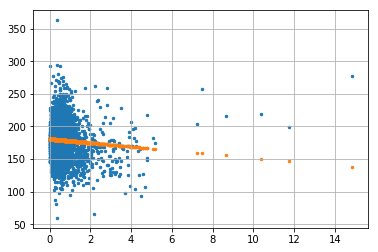

In [254]:
plt.scatter(X44, y, s=6)
plt.scatter(X44, lr.predict(X44), s=6)
plt.grid()

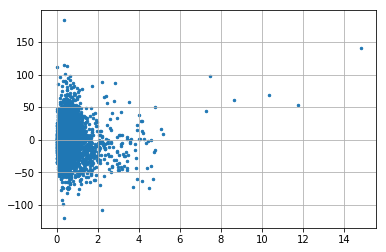

In [255]:
plt.scatter(X44, y - lr.predict(X44), s=6)
plt.grid()

In [256]:
X44.shape

(3047, 1)

In [257]:
dfx44 = pd.DataFrame(X44)
dfx44.head()

,0
0,0.387594
1,0.210984
2,0.832188
3,0.553992
4,0.523033


In [258]:
dfx44['sc_min_dists_l2_log'] = np.log(X44)

In [259]:
dfx44.head()

,0,sc_min_dists_l2_log
0,0.387594,-0.947797
1,0.210984,-1.555975
2,0.832188,-0.183697
3,0.553992,-0.590605
4,0.523033,-0.648111


In [260]:
lr.fit(dfx44, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [261]:
lr.score(dfx44, y)

0.006809229756308044

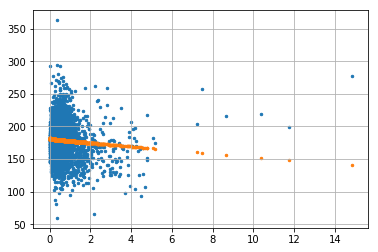

In [262]:
plt.scatter(X44, y, s=6) 
plt.scatter(X44, lr.predict(dfx44), s=6)
plt.grid()

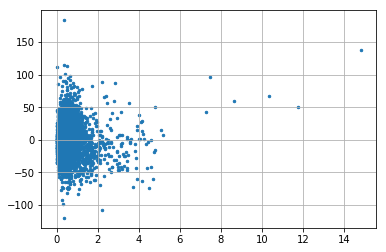

In [263]:
plt.scatter(X44, y - lr.predict(dfx44), s=6)
plt.grid()

In [264]:
dfx44['sc_min_dists_l2_sqrd'] = X44**2

In [265]:
dfx44.head()

,0,sc_min_dists_l2_log,sc_min_dists_l2_sqrd
0,0.387594,-0.947797,0.150229
1,0.210984,-1.555975,0.044514
2,0.832188,-0.183697,0.692536
3,0.553992,-0.590605,0.306907
4,0.523033,-0.648111,0.273563


In [266]:
lr.fit(dfx44, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [267]:
lr.score(dfx44, y)

0.03371764589040738

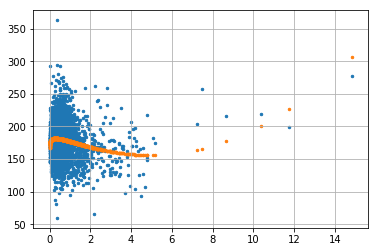

In [268]:
plt.scatter(X44, y, s=6) 
plt.scatter(X44, lr.predict(dfx44), s=6)
plt.grid()

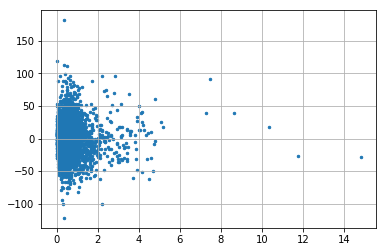

In [269]:
plt.scatter(X44, y - lr.predict(dfx44), s=6)
plt.grid()

In [270]:
X['sc_min_dists_l2_log'] = np.log(X['sc_min_dists_l2'])

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [272]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [273]:
lr.score(X_test, y_test)

0.5967602561655496

The logarithmic version resulted in a decrease in accuracy, so it is dropped from X.

In [274]:
X = X.drop(columns = 'sc_min_dists_l2_log')

In [275]:
X['sc_min_dists_l2_sqrd'] = X['sc_min_dists_l2']**2

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [277]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [278]:
lr.score(X_test, y_test)

0.6010299448667581

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [279]:
X = X.drop(columns = 'sc_min_dists_l2_sqrd')

## 'PCT_LACCESS_POP10': Population, low access to store (%), 2010

In [280]:
X45 = np.array(cancer['PCT_LACCESS_POP10'])
X45 = X45.reshape(-1, 1)

In [281]:
lr.fit(X45, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [282]:
lr.score(X45, y)

0.04960850550945273

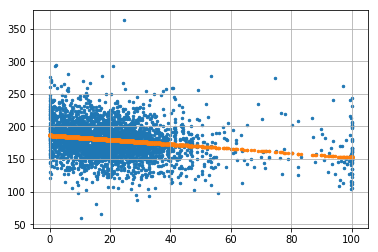

In [283]:
plt.scatter(X45, y, s=6)
plt.scatter(X45, lr.predict(X45), s=6)
plt.grid()

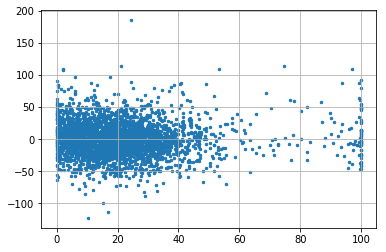

In [284]:
plt.scatter(X45, y - lr.predict(X45), s=6)
plt.grid()

In [285]:
X45.shape

(3047, 1)

In [286]:
dfx45 = pd.DataFrame(X45)
dfx45.head()

,0
0,30.016760
1,1.701383
2,4.606049
3,18.320609
4,7.876416


Due to zero values in 'PCT_LACCESS_POP10', a log version cannot be created.

In [287]:
dfx45['PCT_LACCESS_POP10_sqrd'] = X45**2

In [288]:
dfx45.head()

,0,PCT_LACCESS_POP10_sqrd
0,30.016760,901.005860
1,1.701383,2.894705
2,4.606049,21.215684
3,18.320609,335.644721
4,7.876416,62.037931


In [289]:
lr.fit(dfx45, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [290]:
lr.score(dfx45, y)

0.057970325366576314

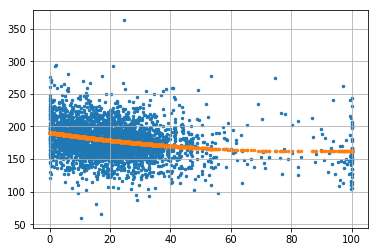

In [291]:
plt.scatter(X45, y, s=6) 
plt.scatter(X45, lr.predict(dfx45), s=6)
plt.grid()

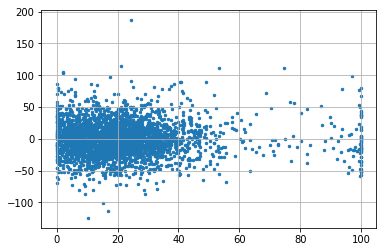

In [292]:
plt.scatter(X45, y - lr.predict(dfx45), s=6)
plt.grid()

In [293]:
X['PCT_LACCESS_POP10_sqrd'] = X['PCT_LACCESS_POP10']**2

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [295]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [296]:
lr.score(X_test, y_test)

0.6047593281190113

The squared version increased accuracy, so it is added to the core feature set.

In [297]:
cancer['PCT_LACCESS_POP10_sqrd'] = cancer['PCT_LACCESS_POP10']**2

## 'PCT_LACCESS_LOWI10': Low income & low access to store (%), 2010

In [298]:
X46 = np.array(cancer['PCT_LACCESS_LOWI10'])
X46 = X46.reshape(-1, 1)

In [299]:
lr.fit(X46, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [300]:
lr.score(X46, y)

0.009111148139025138

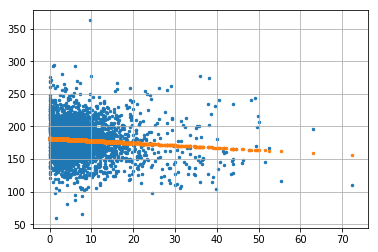

In [301]:
plt.scatter(X46, y, s=6)
plt.scatter(X46, lr.predict(X46), s=6)
plt.grid()

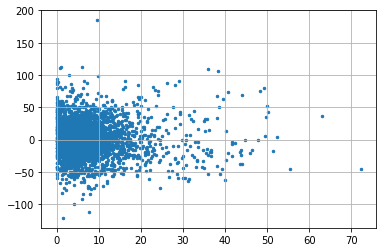

In [302]:
plt.scatter(X46, y - lr.predict(X46), s=6)
plt.grid()

In [303]:
X46.shape

(3047, 1)

In [304]:
dfx46 = pd.DataFrame(X46)
dfx46.head()

,0
0,14.516552
1,0.572560
2,1.685873
3,3.818425
4,2.056509


Due to zero values in 'PCT_LACCESS_LOWI10', a log version cannot be created.

In [305]:
dfx46['PCT_LACCESS_LOWI10_sqrd'] = X46**2

In [306]:
dfx46.head()

,0,PCT_LACCESS_LOWI10_sqrd
0,14.516552,210.730283
1,0.572560,0.327825
2,1.685873,2.842169
3,3.818425,14.580367
4,2.056509,4.229228


In [307]:
lr.fit(dfx46, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [308]:
lr.score(dfx46, y)

0.009155933994461463

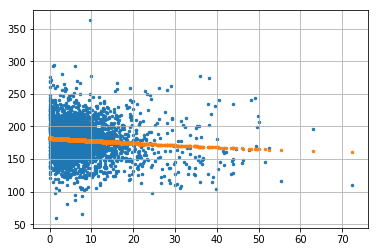

In [309]:
plt.scatter(X46, y, s=6) 
plt.scatter(X46, lr.predict(dfx46), s=6)
plt.grid()

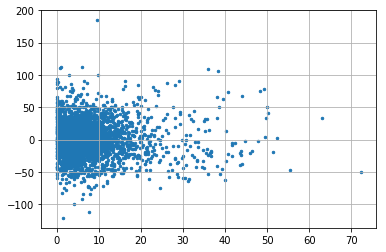

In [310]:
plt.scatter(X46, y - lr.predict(dfx46), s=6)
plt.grid()

In [311]:
X['PCT_LACCESS_LOWI10_sqrd'] = X['PCT_LACCESS_LOWI10']**2

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [313]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [314]:
lr.score(X_test, y_test)

0.5959195019018688

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [315]:
X = X.drop(columns = 'PCT_LACCESS_LOWI10_sqrd')

## 'PCT_LACCESS_CHILD10': Children, low access to store (%), 2010

In [316]:
X47 = np.array(cancer['PCT_LACCESS_CHILD10'])
X47 = X47.reshape(-1, 1)

In [317]:
lr.fit(X47, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [318]:
lr.score(X47, y)

0.04691534815834508

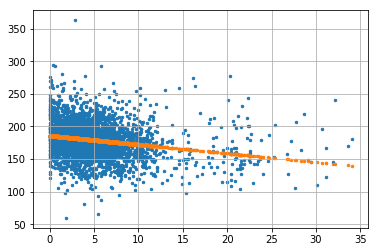

In [319]:
plt.scatter(X47, y, s=6)
plt.scatter(X47, lr.predict(X47), s=6)
plt.grid()

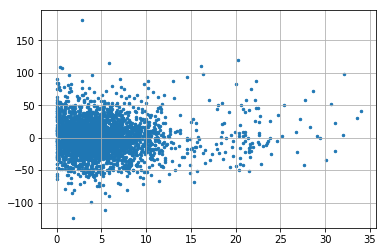

In [320]:
plt.scatter(X47, y - lr.predict(X47), s=6)
plt.grid()

In [321]:
X47.shape

(3047, 1)

In [322]:
dfx47 = pd.DataFrame(X47)
dfx47.head()

,0
0,7.030320
1,0.493074
2,0.718831
3,4.945663
4,1.811461


Due to zero values in 'PCT_LACCESS_CHILD10', a log version cannot be created.

In [323]:
dfx47['PCT_LACCESS_CHILD10_sqrd'] = X47**2

In [324]:
dfx47.head()

,0,PCT_LACCESS_CHILD10_sqrd
0,7.030320,49.425404
1,0.493074,0.243122
2,0.718831,0.516719
3,4.945663,24.459579
4,1.811461,3.281391


In [325]:
lr.fit(dfx47, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [326]:
lr.score(dfx47, y)

0.057745947767899215

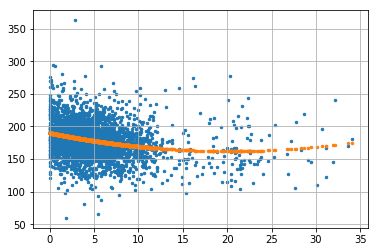

In [327]:
plt.scatter(X47, y, s=6) 
plt.scatter(X47, lr.predict(dfx47), s=6)
plt.grid()

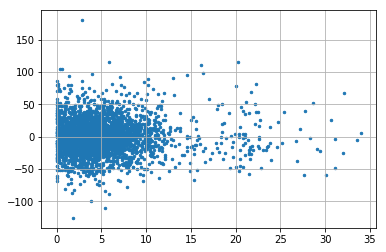

In [328]:
plt.scatter(X47, y - lr.predict(dfx47), s=6)
plt.grid()

In [329]:
X['PCT_LACCESS_CHILD10_sqrd'] = X['PCT_LACCESS_CHILD10']**2

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [331]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [332]:
lr.score(X_test, y_test)

0.5954855422530838

The squared version resulted in a decrease in accuracy, so it is dropped from X.

In [333]:
X = X.drop(columns = 'PCT_LACCESS_CHILD10_sqrd')

## 'PCT_LACCESS_SENIORS10': Seniors, low access to store (%), 2010

In [334]:
X48 = np.array(cancer['PCT_LACCESS_SENIORS10'])
X48 = X48.reshape(-1, 1)

In [335]:
lr.fit(X48, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [336]:
lr.score(X48, y)

0.04308996352391292

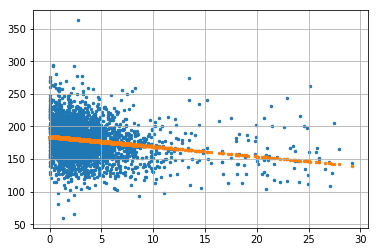

In [337]:
plt.scatter(X48, y, s=6)
plt.scatter(X48, lr.predict(X48), s=6)
plt.grid()

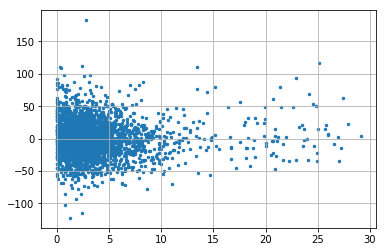

In [338]:
plt.scatter(X48, y - lr.predict(X48), s=6)
plt.grid()

In [339]:
X48.shape

(3047, 1)

In [340]:
dfx48 = pd.DataFrame(X48)
dfx48.head()

,0
0,5.157212
1,0.224201
2,1.170231
3,1.968186
4,1.547285


Due to zero values in 'PCT_LACCESS_SENIORS10', a log version cannot be created.

In [341]:
dfx48['PCT_LACCESS_SENIORS10_sqrd'] = X48**2

In [342]:
dfx48.head()

,0,PCT_LACCESS_SENIORS10_sqrd
0,5.157212,26.596837
1,0.224201,0.050266
2,1.170231,1.369441
3,1.968186,3.873758
4,1.547285,2.394089


In [343]:
lr.fit(dfx48, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [344]:
lr.score(dfx48, y)

0.05032119048148309

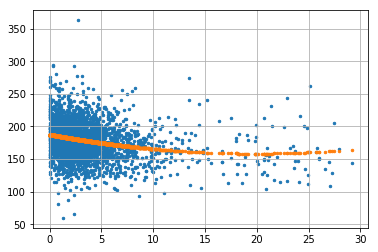

In [345]:
plt.scatter(X48, y, s=6) 
plt.scatter(X48, lr.predict(dfx48), s=6)
plt.grid()

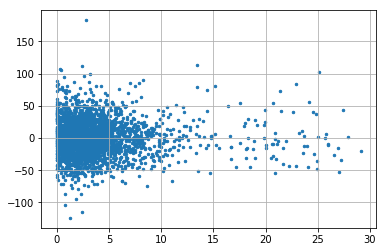

In [346]:
plt.scatter(X48, y - lr.predict(dfx48), s=6)
plt.grid()

In [347]:
X['PCT_LACCESS_SENIORS10_sqrd'] = X['PCT_LACCESS_SENIORS10']**2

In [348]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [349]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [350]:
lr.score(X_test, y_test)

0.5995530822888566

The squared version also resulted in a decrease in accuracy, so it is dropped from X.

In [351]:
X = X.drop(columns = 'PCT_LACCESS_SENIORS10_sqrd')

## 'PCT_LACCESS_HHNV10': Households, no car & low access to store (%), 2010

In [352]:
X49 = np.array(cancer['PCT_LACCESS_HHNV10'])
X49 = X49.reshape(-1, 1)

In [353]:
lr.fit(X49, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [354]:
lr.score(X49, y)

0.09851677343727672

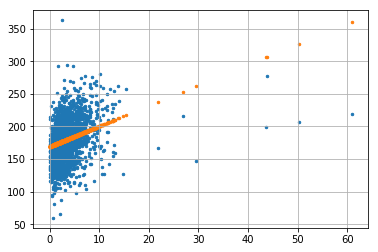

In [355]:
plt.scatter(X49, y, s=6)
plt.scatter(X49, lr.predict(X49), s=6)
plt.grid()

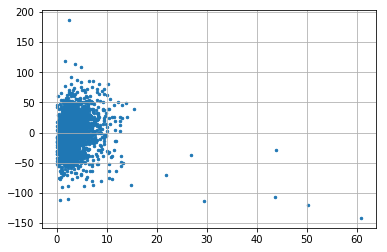

In [356]:
plt.scatter(X49, y - lr.predict(X49), s=6)
plt.grid()

In [357]:
X49.shape

(3047, 1)

In [358]:
dfx49 = pd.DataFrame(X49)
dfx49.head()

,0
0,6.049947
1,1.797018
2,7.706417
3,0.580236
4,1.876358


Due to zero values in 'PCT_LACCESS_HHNV10', a log version cannot be created.

In [359]:
dfx49['PCT_LACCESS_HHNV10_sqrd'] = X49**2

In [360]:
dfx49.head()

,0,PCT_LACCESS_HHNV10_sqrd
0,6.049947,36.601854
1,1.797018,3.229274
2,7.706417,59.388869
3,0.580236,0.336674
4,1.876358,3.520720


In [361]:
lr.fit(dfx49, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [362]:
lr.score(dfx49, y)

0.14232745645603295

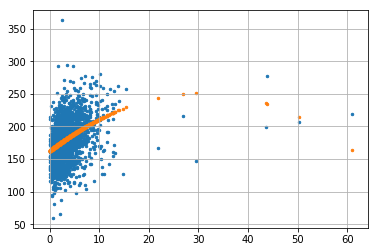

In [363]:
plt.scatter(X49, y, s=6) 
plt.scatter(X49, lr.predict(dfx49), s=6)
plt.grid()

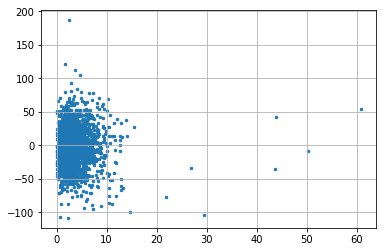

In [364]:
plt.scatter(X49, y - lr.predict(dfx49), s=6)
plt.grid()

In [365]:
X['PCT_LACCESS_HHNV10_sqrd'] = X['PCT_LACCESS_HHNV10']**2

In [366]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [367]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [368]:
lr.score(X_test, y_test)

0.6048227526175257

The squared version increased accuracy, so it is added to the core feature set.

In [369]:
cancer['PCT_LACCESS_HHNV10_sqrd'] = cancer['PCT_LACCESS_HHNV10']**2

In [370]:
cancer.to_csv('cancer_ml5.csv')